In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')

In [3]:
data2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [4]:
df = pd.concat([data2000, data2001], axis=0)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.5,2.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4477 entries, 0 to 2269
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                4477 non-null   object 
 1   adult                  4475 non-null   float64
 2   backdrop_path          1993 non-null   object 
 3   belongs_to_collection  252 non-null    object 
 4   budget                 4475 non-null   float64
 5   genres                 4475 non-null   object 
 6   homepage               224 non-null    object 
 7   id                     4475 non-null   float64
 8   original_language      4475 non-null   object 
 9   original_title         4475 non-null   object 
 10  overview               4126 non-null   object 
 11  popularity             4475 non-null   float64
 12  poster_path            3830 non-null   object 
 13  production_companies   4475 non-null   object 
 14  production_countries   4475 non-null   object 
 15  rele

1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [6]:
filter_budget = df['budget'] > 0
filter_revenue = df['revenue']>0


print('>0 for budget:')
display(filter_budget.value_counts())

print('>0 for revenue:')
display(filter_revenue.value_counts())

>0 for budget:


False    3869
True      608
Name: budget, dtype: int64

>0 for revenue:


False    3982
True      495
Name: revenue, dtype: int64

In [7]:
filter_both = filter_budget & filter_revenue
print(' budget and revenue :')
display(filter_both.value_counts())

 budget and revenue :


False    4103
True      374
dtype: int64

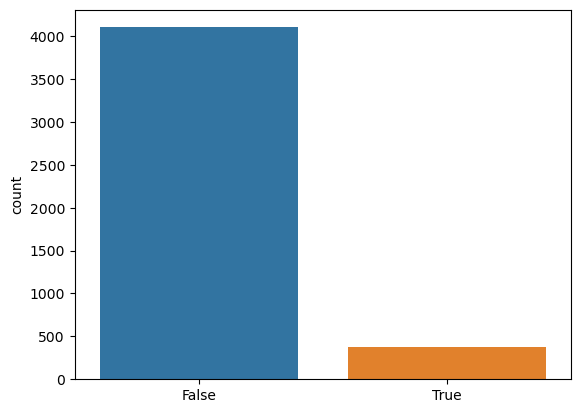

In [10]:
ax = sns.countplot(x=filter_both);

2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?


In [11]:
df['certification'].value_counts()

R          467
PG-13      183
NR          73
PG          66
G           26
NC-17        7
Unrated      1
-            1
Name: certification, dtype: int64

3. What is the average revenue per certification category?

In [12]:
df.groupby(['certification']).mean('revenue')

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
certification,,,,,,,,,
-,0.000000,0.000000e+00,172550.000000,0.600000,0.000000e+00,90.000000,0.000000,5.400000,8.000000
G,0.000000,2.205206e+07,53445.038462,17.003423,6.663261e+07,84.884615,0.038462,6.149731,1368.000000
NC-17,0.571429,0.000000e+00,209781.285714,1.291571,1.668286e+03,45.428571,0.000000,5.414286,4.714286
NR,0.000000,1.467673e+06,250242.301370,3.755603,2.069718e+06,91.000000,0.000000,4.298562,123.054795
PG,0.000000,2.384470e+07,39375.106061,17.945333,5.973842e+07,102.424242,0.000000,6.053455,1385.712121
PG-13,0.000000,3.072491e+07,45844.060109,12.186240,7.092495e+07,104.382514,0.000000,5.807240,1294.781421
R,0.000000,9.690588e+06,65023.261242,7.631668,1.625459e+07,100.486081,0.000000,5.341773,501.905782
Unrated,0.000000,0.000000e+00,169801.000000,2.817000,0.000000e+00,88.000000,0.000000,5.800000,4.000000


4. What is the average budget per certification category?

In [13]:
df.groupby(['certification']).mean('budget')

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
certification,,,,,,,,,
-,0.000000,0.000000e+00,172550.000000,0.600000,0.000000e+00,90.000000,0.000000,5.400000,8.000000
G,0.000000,2.205206e+07,53445.038462,17.003423,6.663261e+07,84.884615,0.038462,6.149731,1368.000000
NC-17,0.571429,0.000000e+00,209781.285714,1.291571,1.668286e+03,45.428571,0.000000,5.414286,4.714286
NR,0.000000,1.467673e+06,250242.301370,3.755603,2.069718e+06,91.000000,0.000000,4.298562,123.054795
PG,0.000000,2.384470e+07,39375.106061,17.945333,5.973842e+07,102.424242,0.000000,6.053455,1385.712121
PG-13,0.000000,3.072491e+07,45844.060109,12.186240,7.092495e+07,104.382514,0.000000,5.807240,1294.781421
R,0.000000,9.690588e+06,65023.261242,7.631668,1.625459e+07,100.486081,0.000000,5.341773,501.905782
Unrated,0.000000,0.000000e+00,169801.000000,2.817000,0.000000e+00,88.000000,0.000000,5.800000,4.000000


In [14]:
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)